In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from pandas.plotting import parallel_coordinates
import os


In [25]:
result_df = pd.DataFrame()

folder_path = "../../eval_results"

#read result.csv file for models which are to be compared

for root, dirs, files in os.walk(folder_path):
    for dir_name in dirs:
        subfolder_path = os.path.join(root, dir_name)
        csv_path = os.path.join(subfolder_path, "results.csv")

        if os.path.exists(csv_path):
            df = pd.read_csv(csv_path)
            result_df = pd.concat([result_df,df])

# max and min scores not really useful (0 or 1 for most)
column_list=[]
for name in result_df.columns:
    if not (("max" in name) or ("min" in name)):
        column_list.append(name)
result_df = result_df[column_list]

result_df.dropna(axis=1,inplace=True) #lt_scores nan for many models

result_df

,Unnamed: 0,PUNCTUATION,rouge1_fmeasure,rouge1_precision,rouge1_recall,rouge2_fmeasure,rouge2_precision,rouge2_recall,rougeL_fmeasure,rougeL_precision,rougeL_recall,rougeLsum_fmeasure,rougeLsum_precision,rougeLsum_recall,avg_p,avg_r,avg_f1,avg_cos_sim,avg_sem_meteor
0,T5-master-final-l,3,0.503849,0.544128,0.508108,0.324666,0.356638,0.325038,0.491008,0.529389,0.496169,0.491508,0.529857,0.496704,0.609130,0.503483,0.525730,0.709842,0.484352
0,T5-master-final,6,0.503335,0.543016,0.506342,0.322876,0.354410,0.322707,0.490599,0.528769,0.494246,0.491098,0.529237,0.494781,0.601153,0.499002,0.520432,0.700917,0.485451
0,llama,10,0.385516,0.394234,0.411271,0.218086,0.218729,0.238909,0.371626,0.380090,0.396207,0.372917,0.381826,0.397309,0.429816,0.428601,0.408076,0.652435,0.380599
0,vit-gpt2-master-E-3,7,0.161453,0.140999,0.213516,0.033501,0.029617,0.044928,0.155341,0.134679,0.207193,0.155680,0.135021,0.207530,0.033877,0.039864,0.035035,0.164043,0.144781


In [27]:
result_df.drop(columns=['PUNCTUATION'],inplace=True) # punctutation not in same range as other metrics

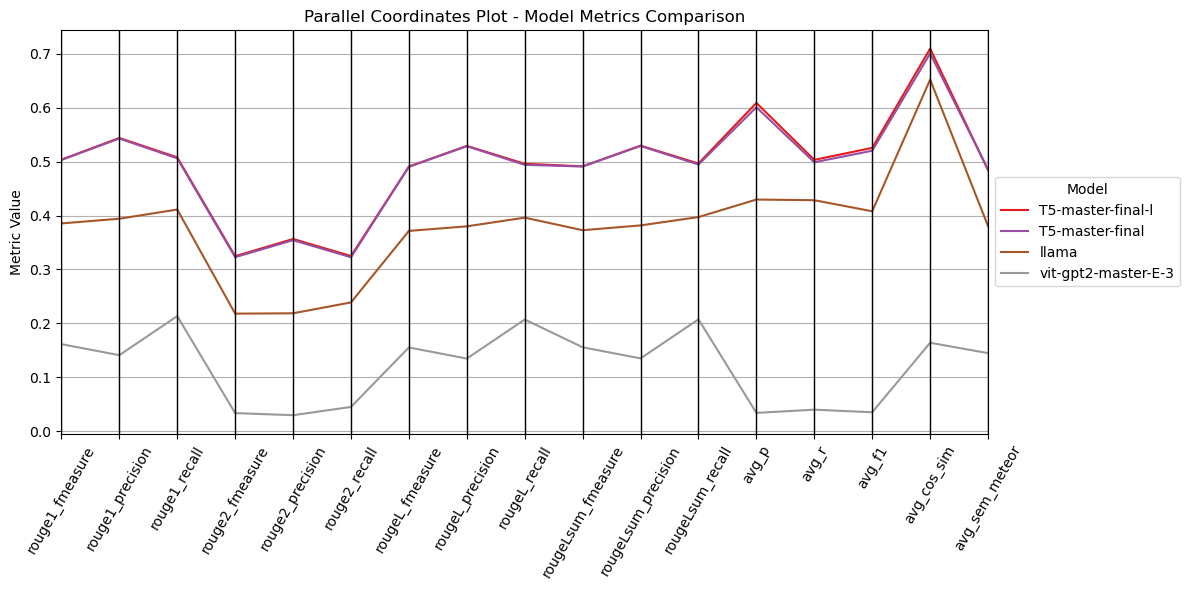

In [28]:
# Create a parallel coordinates plot
plt.figure(figsize=(12, 6))
parallel_coordinates(result_df, 'Unnamed: 0', colormap=plt.get_cmap("Set1"))
plt.title('Model Metrics Comparison')
plt.ylabel('Metric Value')
plt.xticks(rotation=60)
plt.legend(title='Model', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()